<a href="https://colab.research.google.com/github/OlegBogutsky/nn2022/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота № 5
---
## Виконав Богуцький Олег, КН-31
#Завдання:
1. На основі документу вирішити завдання класифікації зображень їжі для 3 класів з набору даних food101
2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи.
- i1 = 1
- i2 = 31
- i3 = 61
---
# Хід роботи


Завантажуємо набір даних.

In [2]:
import tarfile


!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

file = tarfile.open("food-101.tar.gz")
file.extractall()
file.close()

--2022-04-17 07:32:22--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2022-04-17 07:32:22--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  28.2MB/s    in 3m 7s   

2022-04-17 07:35:30 (25.4 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



Перевіряємо файли.

In [9]:
import os

for dirpath, dirnames, filenames in os.walk("food-101"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 2 images in 'food-101'.
There are 3 directories and 0 images in 'food-101/train'.
There are 0 directories and 750 images in 'food-101/train/lobster_roll_sandwich'.
There are 0 directories and 750 images in 'food-101/train/baby_back_ribs'.
There are 0 directories and 750 images in 'food-101/train/donuts'.
There are 3 directories and 0 images in 'food-101/test'.
There are 0 directories and 250 images in 'food-101/test/lobster_roll_sandwich'.
There are 0 directories and 250 images in 'food-101/test/baby_back_ribs'.
There are 0 directories and 250 images in 'food-101/test/donuts'.
There are 101 directories and 0 images in 'food-101/images'.
There are 0 directories and 1000 images in 'food-101/images/chicken_curry'.
There are 0 directories and 1000 images in 'food-101/images/club_sandwich'.
There are 0 directories and 1000 images in 'food-101/images/garlic_bread'.
There are 0 directories and 1000 images in 'food-101/images/chocolate_cake'.
There are 0 directories

Позначаємо папку.

In [6]:
!ls food-101

images	license_agreement.txt  meta  README.txt  test  train


Створюємо необхідні папки для тренування та тестування.

In [5]:
!mkdir food-101/test
!mkdir food-101/train
!mkdir food-101/test/baby_back_ribs
!mkdir food-101/test/donuts
!mkdir food-101/test/lobster_roll_sandwich
!mkdir food-101/train/baby_back_ribs
!mkdir food-101/train/donuts
!mkdir food-101/train/lobster_roll_sandwich


mkdir: cannot create directory ‘food-101/test’: File exists
mkdir: cannot create directory ‘food-101/train’: File exists
mkdir: cannot create directory ‘food-101/test/baby_back_ribs’: File exists


Знаходимо необхідні нам класи.

In [7]:
file = open('food-101/meta/classes.txt')

line_numbers = [1, 31, 61]
    
lines = []
for i, line in enumerate(file):
        
  if i in line_numbers:
    lines.append(line.strip())
print(lines)

['baby_back_ribs', 'donuts', 'lobster_roll_sandwich']


Копіюємо необхідні фото в папки для тренування та навчання.

In [7]:
import shutil
file = open('food-101/meta/train.txt')
for i in file:
  dir = i.split("/")
  if (dir[0] == 'baby_back_ribs'):
    shutil.copy('food-101/images/'+i.replace('\n','') +'.jpg', 'food-101/train/baby_back_ribs')
  elif(dir[0] == 'donuts'):
    shutil.copy('food-101/images/'+i.replace('\n','') +'.jpg', 'food-101/train/donuts')
  elif(dir[0] == 'lobster_roll_sandwich'):
    shutil.copy('food-101/images/'+i.replace('\n','') +'.jpg', 'food-101/train/lobster_roll_sandwich')

In [8]:
import shutil
file = open('food-101/meta/test.txt')
for i in file:
  dir = i.split("/")
  if (dir[0] == 'baby_back_ribs'):
    shutil.copy('food-101/images/'+i.replace('\n','') +'.jpg', 'food-101/test/baby_back_ribs')
  elif(dir[0] == 'donuts'):
    shutil.copy('food-101/images/'+i.replace('\n','') +'.jpg', 'food-101/test/donuts')
  elif(dir[0] == 'lobster_roll_sandwich'):
    shutil.copy('food-101/images/'+i.replace('\n','') +'.jpg', 'food-101/test/lobster_roll_sandwich')

In [ ]:
!ls food-101/test

Позначаємо тренувальні та тестувальні папки.

In [10]:
test_dir = 'food-101/test'
train_dir = 'food-101/train'

In [11]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['baby_back_ribs' 'donuts' 'lobster_roll_sandwich']


Перетворюємо зображення у набори даних.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


Змінюємо зображення для кращого навчання.

In [13]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 2250 images belonging to 3 classes.


Навчаємо мережу.

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_11 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Dense(128, activation='relu'),
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_11 = model_11.fit(train_data_augmented,
                          epochs=50,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/50
71/71 [==============================] - 36s 490ms/step - loss: 1.1510 - accuracy: 0.4080 - val_loss: 0.9701 - val_accuracy: 0.4853
Epoch 2/50
71/71 [==============================] - 34s 485ms/step - loss: 1.0124 - accuracy: 0.4951 - val_loss: 0.9755 - val_accuracy: 0.5440
Epoch 3/50
71/71 [==============================] - 35s 486ms/step - loss: 0.9432 - accuracy: 0.5476 - val_loss: 0.8808 - val_accuracy: 0.5973
Epoch 4/50
71/71 [==============================] - 34s 484ms/step - loss: 0.8960 - accuracy: 0.5911 - val_loss: 0.7916 - val_accuracy: 0.6400
Epoch 5/50
71/71 [==============================] - 34s 482ms/step - loss: 0.8233 - accuracy: 0.6147 - val_loss: 0.9663 - val_accuracy: 0.5680
Epoch 7/50
71/71 [==============================] - 35s 488ms/step - loss: 0.7709 - accuracy: 0.6520 - val_loss: 0.7354 - val_accuracy: 0.6853
Epoch 8/50
71/71 [==============================] - 35s 486ms/step - loss: 0.7718 - accuracy: 0.6502 - val_loss: 0.7779 - val_accuracy: 0.6493

In [50]:
model_11.save('model2.hdf5')

Побудуємо графіки.

In [48]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

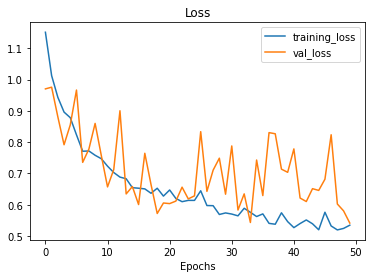

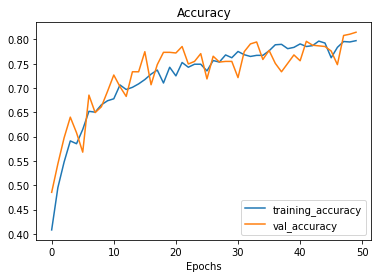

In [49]:
plot_loss_curves(history_11)

Висновок: у цій лабораторній роботі я навчився працювати з зображеннями, перетворювати їх для роботи з нейромережею, працювати з моделями для обробки зображень.